In [2]:
"""
This script builds a simple linear regression model from scratch using MSE. 
The dataset I'm using is weather data with MaxTemp and MinTemp and 
trying to fit a linear relation between the two features.
"""
#First import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from cmath import sqrt

In [3]:
#read the data into a dataframe and see how it looks like
data_input = pd.read_csv("data/Weather.csv")
data_input.head()

,MaxTemp,MinTemp
0,25.555556,22.222222
1,28.888889,21.666667
2,26.111111,22.222222
3,26.666667,22.222222
4,26.666667,21.666667


In [75]:
data_input.describe()

,MaxTemp,MinTemp
count,65534.000000,65534.000000
mean,26.478215,17.906803
std,9.632545,8.993936
min,-33.333333,-38.333333
25%,26.111111,16.666667
50%,29.444444,21.111111
75%,31.111111,23.333333
max,47.222222,33.888889


In [76]:
#Defining X and y from data set
X = data_input["MaxTemp"].values.reshape(-1,1)
y = data_input["MinTemp"].values.reshape(-1,1)

Text(0, 0.5, 'MinTemp')

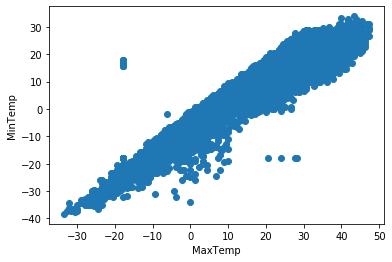

In [77]:
#lets plot a scatter plot to get an idea on the visual relationship
plt.scatter(X,y)
plt.xlabel("MaxTemp")
plt.ylabel("MinTemp")

In the above scatter plot, if you do not see an approximate linear relationship between the two variables, 
do not proceed with linear regression. Since this looks visually linear, let us proceed with a simple
linear regression model. The following are the formulae that we should use: 
$$
y = mx + c
$$
$$
m = \frac{\sum_{i=1}^n (x_i-\mu_x)(y_i-\mu_y)}{\sum_{i=1}^n (x_i-\mu_x)^2} 
$$
$$
c = \mu_y - m*\mu_x
$$
m(slope), c(intercept) are the variables to be calculated from test data. For that we need the following statistical information:
1. Mean, $\mu_x = \frac{\sum_{i=1}^n x}{n} $
2. Variance, $\sigma^2 = \sum_{i=1}^n (x_i-\mu_x)^2 $
3. Covariance, $cov(x,y) = \sum_{i=1}^n (x_i-\mu_x)(y_i-\mu_y)$

In [81]:
#Define a class for Linear model
class LinearModel:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
#define a function to split data to test, train assuming 80-20 ratio
    def test_train(self,z):
        trainlen = round(len(z)*0.8)
        ztrain = z[:trainlen]
        ztest = z[trainlen:]
        return ztrain, ztest
    
#define the mean, variance and covariance functions
    def find_mean(self,z):
        return sum(z)/float(len(z))

    def find_variance(self,z):
        uz = self.find_mean(z)
        var = 0
        for zt in z:
            var += (zt - uz)**2
        return var

    def find_covariance(self,x,y):
        cov = 0
        ux = self.find_mean(x)
        uy = self.find_mean(y)
        for xt, yt in zip(x, y):
            cov += (xt - ux) * (yt - uy)
        return cov

#Now use the above statistical info to find regression coeffiecients
    def model_fit(self, x, y):
        m = self.find_covariance(x,y)/self.find_variance(x)
        c = self.find_mean(y) - m * self.find_mean(x)
        return m, c

#Use the model parameters to predict on test data 
    def make_predictions(self, m, c, test):
        ypred = []
        for x in test:
            ypred.append(m * x + c)
        return ypred
    
#finding RMSE
    def find_rmse(self, ytest, ypred):
        error = 0
        for i in range(len(ytest)):
            error += (ytest[i] - ypred[i] ** 2)
        return sqrt(self.find_mean(error))

In [83]:
#Let us fit the regression model and make prediction on our given data set
regressor = LinearModel(X,y)
xtrain, xtest = regressor.test_train(X)
ytrain, ytest = regressor.test_train(y)
m, c = regressor.model_fit(xtrain, ytrain)
ypred = regressor.make_predictions(m,c,xtest)

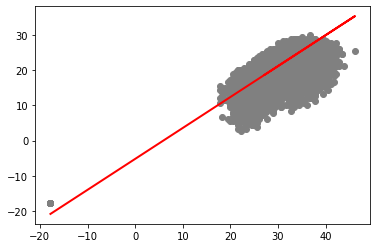

In [85]:
#Plotting the predicted linear model against the original data

plt.scatter(xtest, ytest,color="gray")
plt.plot(xtest,ypred,color = "red", linewidth = 2)
plt.show()